Football Predictions

In [ ]:
import numpy as np #for data processing
import pandas as pd #linear algebra
import seaborn as sns #to visualise data

import the datasets and conduct data analysis



In [92]:
#And we are using 4 data set so we assigned each data set a variable name for distiction
standings_df = pd.read_csv("2023_PL_standings.csv")
results_df = pd.read_csv("2023_matchday_results.csv",parse_dates=['fixture.date'])
home_df = pd.read_csv("2023_home_teams_stats.csv")
away_df = pd.read_csv("2023_away_teams_stats.csv")

In [93]:
#This line of code df.head is for displaying the first few rows of a DataFrame of the home team
home_df.head()


,fixture id,Home team id,Home team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,Corner Kicks,Offsides,Ball Possession,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals
0,867946,52,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,3.0,1.0,56%,1.0,NaN,1.0,562,487,87%,NaN
1,867947,36,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,4.0,4.0,33%,2.0,NaN,1.0,294,181,62%,NaN
2,867948,35,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,5.0,1.0,34%,3.0,NaN,2.0,301,211,70%,NaN
3,867949,63,Leeds,4.0,5.0,12,3.0,7.0,5.0,13,6.0,NaN,40%,2.0,NaN,5.0,355,269,76%,NaN
4,867950,46,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,5.0,2.0,55%,NaN,NaN,1.0,580,510,88%,NaN


In [94]:
#This line of code df.head is for displaying the first few rows of a DataFrame of the away team
away_df.head()

,fixture id,away team id,away team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,Corner Kicks,Offsides,Ball Possession,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals
0,867946,42.0,Arsenal,2.0,4.0,10,4.0,8.0,2.0,11,5.0,2.0,44%,2.0,NaN,2.0,438,360,82%,NaN
1,867947,40.0,Liverpool,4.0,5.0,11,2.0,9.0,2.0,9,4.0,4.0,67%,NaN,NaN,1.0,612,473,77%,NaN
2,867948,66.0,Aston Villa,2.0,7.0,15,6.0,4.0,11.0,16,5.0,4.0,66%,3.0,NaN,1.0,571,479,84%,NaN
3,867949,39.0,Wolves,6.0,6.0,15,3.0,8.0,7.0,9,4.0,1.0,60%,NaN,NaN,3.0,546,463,85%,NaN
4,867950,55.0,Brentford,3.0,4.0,8,1.0,5.0,3.0,5,6.0,2.0,45%,NaN,NaN,3.0,457,386,84%,NaN


In [95]:
#This line of code df.head is for displaying the first few rows of a DataFrame of the results of the matches played
results_df.head()

,Unnamed: 0,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away
0,0,867946,2022-08-05 19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2
1,1,867947,2022-08-06 11:30:00+00:00,36,Fulham,NaN,40,Liverpool,NaN,2,2
2,2,867948,2022-08-06 14:00:00+00:00,35,Bournemouth,True,66,Aston Villa,False,2,0
3,3,867949,2022-08-06 14:00:00+00:00,63,Leeds,True,39,Wolves,False,2,1
4,4,867950,2022-08-07 13:00:00+00:00,46,Leicester,NaN,55,Brentford,NaN,2,2


In [96]:
#This line of code df.head is for displaying the first few rows of a DataFrame of the standings of each team in that season
standings_df.head()

,rank,points,goalsDiff,team_id,team.name,matches_played,wins,draws,losses,goals_for,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,1,89,61,50,Manchester City,38,28,5,5,94,...,1,1,60,17,19,11,4,4,34,16
1,2,84,45,42,Arsenal,38,26,6,6,88,...,3,2,53,25,19,12,3,4,35,18
2,3,75,15,33,Manchester United,38,23,6,9,58,...,3,1,36,10,19,8,3,8,22,33
3,4,71,35,34,Newcastle,38,19,14,5,68,...,6,2,36,14,19,8,8,3,32,19
4,5,67,28,40,Liverpool,38,19,10,9,75,...,5,1,46,17,19,6,5,8,29,30


In [97]:
# Here we are trying to get information about the data types, non-null values, and memory usage. This of code below 'df.info' is helpful for quickly assessing the overall structure of our dataframe for the home team.
home_df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixture id        380 non-null    int64  
 1   Home team id      380 non-null    int64  
 2   Home team name    380 non-null    object 
 3   Shots on Goal     374 non-null    float64
 4   Shots off Goal    376 non-null    float64
 5   Total Shots       380 non-null    int64  
 6   Blocked Shots     364 non-null    float64
 7   Shots insidebox   379 non-null    float64
 8   Shots outsidebox  376 non-null    float64
 9   Fouls             380 non-null    int64  
 10  Corner Kicks      374 non-null    float64
 11  Offsides          303 non-null    float64
 12  Ball Possession   380 non-null    object 
 13  Yellow Cards      306 non-null    float64
 14  Red Cards         18 non-null     float64
 15  Goalkeeper Saves  338 non-null    float64
 16  Total passes      380 non-null    int64  
 1

In [98]:

# Here we are trying to get information about the data types, non-null values, and memory usage. 
#This of code below 'df.info' is helpful for quickly assessing the overall structure of our dataframe for the away team.
away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixture id        380 non-null    int64  
 1   away team id      380 non-null    float64
 2   away team name    380 non-null    object 
 3   Shots on Goal     364 non-null    float64
 4   Shots off Goal    367 non-null    float64
 5   Total Shots       380 non-null    int64  
 6   Blocked Shots     353 non-null    float64
 7   Shots insidebox   379 non-null    float64
 8   Shots outsidebox  361 non-null    float64
 9   Fouls             380 non-null    int64  
 10  Corner Kicks      373 non-null    float64
 11  Offsides          291 non-null    float64
 12  Ball Possession   380 non-null    object 
 13  Yellow Cards      327 non-null    float64
 14  Red Cards         10 non-null     float64
 15  Goalkeeper Saves  356 non-null    float64
 16  Total passes      380 non-null    int64  
 1

In [99]:
# Here we are trying to get information about the data types, non-null values, and memory usage. 
#This of code below 'df.info' is helpful for quickly assessing the overall structure of our dataframe for the seasons result of the matches played.
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Unnamed: 0         380 non-null    int64              
 1   fixture.id         380 non-null    int64              
 2   fixture.date       380 non-null    datetime64[ns, UTC]
 3   teams.home.id      380 non-null    int64              
 4   teams.home.name    380 non-null    object             
 5   teams.home.winner  293 non-null    object             
 6   teams.away.id      380 non-null    int64              
 7   teams.away.name    380 non-null    object             
 8   teams.away.winner  293 non-null    object             
 9   goals.home         380 non-null    int64              
 10  goals.away         380 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(6), object(4)
memory usage: 32.8+ KB


In [100]:
#This of code below 'df.info' is helpful for quickly assessing the overall structure of our dataframe for the standing of each team for that season '2022/2023'.
standings_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rank                20 non-null     int64 
 1   points              20 non-null     int64 
 2   goalsDiff           20 non-null     int64 
 3   team_id             20 non-null     int64 
 4   team.name           20 non-null     object
 5   matches_played      20 non-null     int64 
 6   wins                20 non-null     int64 
 7   draws               20 non-null     int64 
 8   losses              20 non-null     int64 
 9   goals_for           20 non-null     int64 
 10  goals_against       20 non-null     int64 
 11  home                20 non-null     int64 
 12  home_wins           20 non-null     int64 
 13  home_draw           20 non-null     int64 
 14  home_lose           20 non-null     int64 
 15  home_goals_for      20 non-null     int64 
 16  home_goals_against  20 non-n

Observation 1:

Based off of getting datasets information, we observe:
- Standings Dataset has no missing value; it has one caegorical column.
- results Dataset has 87 null values on 2 columns.
- Away dataset has missing values
- Home dataset has missing values as well.

Dealing with Result dataset

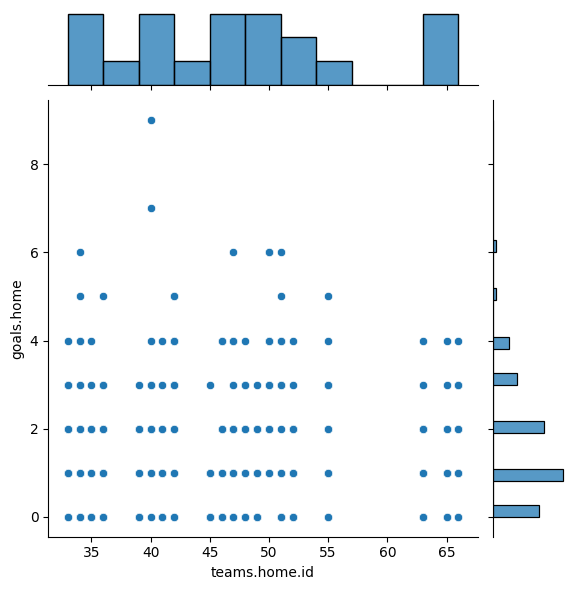

In [101]:
#so in this line of code we are using seaborn a module to create a scatter plot with a marginal distribution for both 'teams.home.id' and 'goals.home'.
sns.jointplot(x='teams.home.id', y='goals.home', data=results_df)

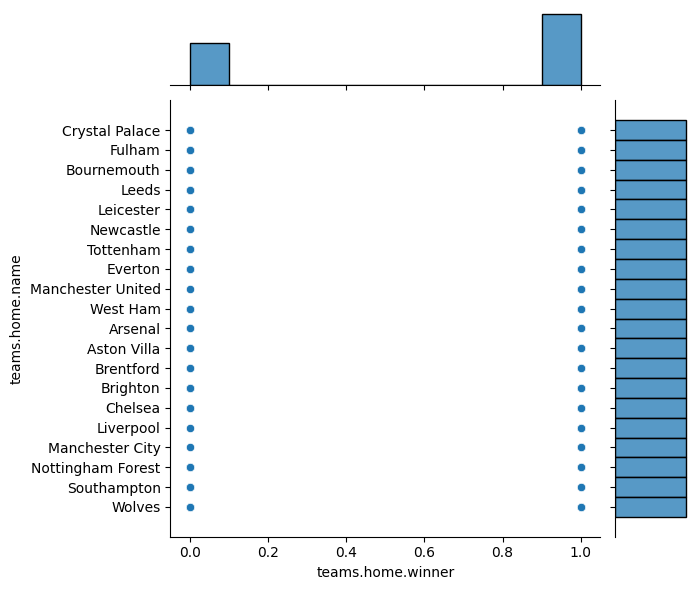

In [102]:
#This code will create a scatter plot with a marginal distribution for both 'teams.home.winner' and 'teams.home.name'.
sns.jointplot(x='teams.home.winner', y='teams.home.name', data=results_df)

<Axes: xlabel='teams.home.winner', ylabel='count'>

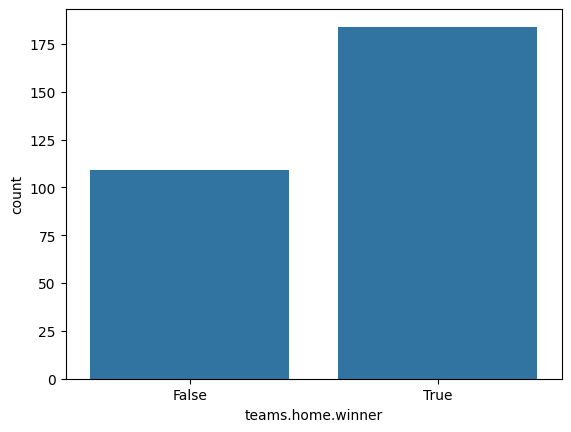

In [103]:
#This code will generate a bar plot showing the count of each unique value in the "teams.home.winner" column
sns.countplot(x="teams.home.winner", data=results_df)

In [104]:
#this line displays the column names of the results DataFrame
results_df.columns

Index(['Unnamed: 0', 'fixture.id', 'fixture.date', 'teams.home.id',
       'teams.home.name', 'teams.home.winner', 'teams.away.id',
       'teams.away.name', 'teams.away.winner', 'goals.home', 'goals.away'],
      dtype='object')

based on observable information, we do not need team name, we will drop these columns


In [105]:
#Here we have to drop this two columns as we do no see the need for them
results_df = results_df.drop(columns=['Unnamed: 0', 'teams.home.name','teams.away.name'])

In [106]:
#create another column called date, this wil extract date from fixture date column and assign it to the date column
results_df['date'] = results_df['fixture.date'].apply(lambda x: x.date())
results_df['date']=pd.to_datetime(results_df['date'])



We will be performing Ordinal encoding to deal with the missing values on the team.home.winner column
we will do this by creating a column called "full time", which maps null or NaN value to Draw instead.


In [107]:
conditions = [
    (results_df['teams.home.winner'] == True),
    (results_df['teams.home.winner'] == False),
    (results_df['teams.home.winner'].isnull())
    ]
# create a list of the values we want to assign for each condition
values = ['home', 'away', 'draw']

#
results_df['full_time'] = np.select(conditions, values)

In [108]:
#check our result dataset
results_df.head()

,fixture.id,fixture.date,teams.home.id,teams.home.winner,teams.away.id,teams.away.winner,goals.home,goals.away,date,full_time
0,867946,2022-08-05 19:00:00+00:00,52,False,42,True,0,2,2022-08-05,away
1,867947,2022-08-06 11:30:00+00:00,36,NaN,40,NaN,2,2,2022-08-06,draw
2,867948,2022-08-06 14:00:00+00:00,35,True,66,False,2,0,2022-08-06,home
3,867949,2022-08-06 14:00:00+00:00,63,True,39,False,2,1,2022-08-06,home
4,867950,2022-08-07 13:00:00+00:00,46,NaN,55,NaN,2,2,2022-08-07,draw


Since we have created a column "Full time", this eliminates the need for the "teams.home.winner" and "teams.away.winner", these columns will be dropped to eliminate redundancy.
we will rename fixture ID column 

In [109]:
results_df = results_df.drop(columns=['teams.home.winner','teams.away.winner'])
results_df = results_df.rename(columns={'fixture.id':'fixture id'})

In [110]:
results_df.head()

,fixture id,fixture.date,teams.home.id,teams.away.id,goals.home,goals.away,date,full_time
0,867946,2022-08-05 19:00:00+00:00,52,42,0,2,2022-08-05,away
1,867947,2022-08-06 11:30:00+00:00,36,40,2,2,2022-08-06,draw
2,867948,2022-08-06 14:00:00+00:00,35,66,2,0,2022-08-06,home
3,867949,2022-08-06 14:00:00+00:00,63,39,2,1,2022-08-06,home
4,867950,2022-08-07 13:00:00+00:00,46,55,2,2,2022-08-07,draw


In [111]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   fixture id     380 non-null    int64              
 1   fixture.date   380 non-null    datetime64[ns, UTC]
 2   teams.home.id  380 non-null    int64              
 3   teams.away.id  380 non-null    int64              
 4   goals.home     380 non-null    int64              
 5   goals.away     380 non-null    int64              
 6   date           380 non-null    datetime64[ns]     
 7   full_time      380 non-null    object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(5), object(1)
memory usage: 23.9+ KB


Conclusion on Result dataset:
Based on the EDA ran, our data has now been cleaned 😁

PHASE 2:
Merging our Home and away Dataset

In [112]:
home_df.columns

Index(['fixture id', 'Home team id', 'Home team name', 'Shots on Goal',
       'Shots off Goal', 'Total Shots', 'Blocked Shots', 'Shots insidebox',
       'Shots outsidebox', 'Fouls', 'Corner Kicks', 'Offsides',
       'Ball Possession', 'Yellow Cards', 'Red Cards', 'Goalkeeper Saves',
       'Total passes', 'Passes accurate', 'Passes %', 'expected_goals'],
      dtype='object')

In [113]:
away_df.columns

Index(['fixture id', 'away team id', 'away team name', 'Shots on Goal',
       'Shots off Goal', 'Total Shots', 'Blocked Shots', 'Shots insidebox',
       'Shots outsidebox', 'Fouls', 'Corner Kicks', 'Offsides',
       'Ball Possession', 'Yellow Cards', 'Red Cards', 'Goalkeeper Saves',
       'Total passes', 'Passes accurate', 'Passes %', 'expected_goals'],
      dtype='object')

In [114]:
home_df = pd.merge(home_df, away_df[['fixture id','away team id', 'away team name']], on='fixture id')
away_df = pd.merge(away_df, home_df[['fixture id','Home team id', 'Home team name']], on='fixture id')

In [115]:
#renaming our columns
home_rename = {
    'Home team id': 'team id',
    'Home team name': 'team name',
    'away team id': 'opponent id',
    'away team name': 'opponent name'
}

away_rename = {
    'away team id': 'team id',
    'away team name': 'team name',
    'Home team id': 'opponent id',
    'Home team name': 'opponent name'
}

In [116]:
home_rename_df=home_df.rename(columns=home_rename)
away_rename_df=away_df.rename(columns=away_rename)


In [117]:
home_rename_df['Home']=1 #adding a home column and assigning values for home_rename_df and away_rename_df
away_rename_df['Home']=0

In [118]:
#concatenate our results into one dataset 
match_stats_df = pd.concat([home_rename_df, away_rename_df])
match_stats_df.head()

,fixture id,team id,team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,...,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals,opponent id,opponent name,Home
0,867946,52.0,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,...,1.0,NaN,1.0,562,487,87%,NaN,42.0,Arsenal,1
1,867947,36.0,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,...,2.0,NaN,1.0,294,181,62%,NaN,40.0,Liverpool,1
2,867948,35.0,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,...,3.0,NaN,2.0,301,211,70%,NaN,66.0,Aston Villa,1
3,867949,63.0,Leeds,4.0,5.0,12,3.0,7.0,5.0,13,...,2.0,NaN,5.0,355,269,76%,NaN,39.0,Wolves,1
4,867950,46.0,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,...,NaN,NaN,1.0,580,510,88%,NaN,55.0,Brentford,1


In [119]:
#concatenate information from result column into our main dataset
match_stats_df = pd.merge(match_stats_df, results_df[['fixture id','full_time','date']], on="fixture id")

In [120]:
match_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fixture id        760 non-null    int64         
 1   team id           760 non-null    float64       
 2   team name         760 non-null    object        
 3   Shots on Goal     738 non-null    float64       
 4   Shots off Goal    743 non-null    float64       
 5   Total Shots       760 non-null    int64         
 6   Blocked Shots     717 non-null    float64       
 7   Shots insidebox   758 non-null    float64       
 8   Shots outsidebox  737 non-null    float64       
 9   Fouls             760 non-null    int64         
 10  Corner Kicks      747 non-null    float64       
 11  Offsides          594 non-null    float64       
 12  Ball Possession   760 non-null    object        
 13  Yellow Cards      633 non-null    float64       
 14  Red Cards         28 non-n

So filling out missing values with 0 will not affect our final predictions because for the values there, Null should be Zero. 

In [121]:
match_stats_df = match_stats_df.fillna(0)

In [122]:
match_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fixture id        760 non-null    int64         
 1   team id           760 non-null    float64       
 2   team name         760 non-null    object        
 3   Shots on Goal     760 non-null    float64       
 4   Shots off Goal    760 non-null    float64       
 5   Total Shots       760 non-null    int64         
 6   Blocked Shots     760 non-null    float64       
 7   Shots insidebox   760 non-null    float64       
 8   Shots outsidebox  760 non-null    float64       
 9   Fouls             760 non-null    int64         
 10  Corner Kicks      760 non-null    float64       
 11  Offsides          760 non-null    float64       
 12  Ball Possession   760 non-null    object        
 13  Yellow Cards      760 non-null    float64       
 14  Red Cards         760 non-

In [123]:
match_stats_df.head(5)

,fixture id,team id,team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,...,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals,opponent id,opponent name,Home,full_time,date
0,867946,52.0,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,...,1.0,562,487,87%,0.0,42.0,Arsenal,1,away,2022-08-05
1,867946,42.0,Arsenal,2.0,4.0,10,4.0,8.0,2.0,11,...,2.0,438,360,82%,0.0,52.0,Crystal Palace,0,away,2022-08-05
2,867947,36.0,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,...,1.0,294,181,62%,0.0,40.0,Liverpool,1,draw,2022-08-06
3,867947,40.0,Liverpool,4.0,5.0,11,2.0,9.0,2.0,9,...,1.0,612,473,77%,0.0,36.0,Fulham,0,draw,2022-08-06
4,867948,35.0,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,...,2.0,301,211,70%,0.0,66.0,Aston Villa,1,home,2022-08-06


In [124]:
#this line of code
match_stats_df.columns 

Index(['fixture id', 'team id', 'team name', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards',
       'Red Cards', 'Goalkeeper Saves', 'Total passes', 'Passes accurate',
       'Passes %', 'expected_goals', 'opponent id', 'opponent name', 'Home',
       'full_time', 'date'],
      dtype='object')

In [125]:
#change our object datatype to int datatype and remove the % from the column
match_stats_df['Ball Possession'] = match_stats_df['Ball Possession'].str.replace('%','').astype(int)
match_stats_df['Passes %'] = match_stats_df['Passes %'].str.replace('%','').astype(int)

In [126]:
#merge our home and away columns with our fulltime column from rsults dataset
conditions = [
    ((match_stats_df['full_time'] == 'home')&(match_stats_df['Home']==1) | (match_stats_df['full_time'] == 'away')&(match_stats_df['Home']==0)),
    ((match_stats_df['full_time'] == 'home')&(match_stats_df['Home']==0) | (match_stats_df['full_time'] == 'away')&(match_stats_df['Home']==1)),
    (match_stats_df['full_time'] == 'draw')
    ]

#nominally encode the values 
# create a list of the values we want to assign for each condition
# 1 - Win, -1 - Loss, 0- draw
values = [1, -1, 0]

match_stats_df['result'] = np.select(conditions, values)

In [127]:
#convert float dtype columns to integers
float_columns = match_stats_df.select_dtypes(include=[float]).columns
match_stats_df[float_columns] = match_stats_df[float_columns].astype(int)


In [128]:
match_stats_df.shape

(760, 26)

In [129]:
match_stats_df['result'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 760 entries, 0 to 759
Series name: result
Non-Null Count  Dtype
--------------  -----
760 non-null    int32
dtypes: int32(1)
memory usage: 3.1 KB


In [130]:
match_stats_df.head(5)
match_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fixture id        760 non-null    int64         
 1   team id           760 non-null    int32         
 2   team name         760 non-null    object        
 3   Shots on Goal     760 non-null    int32         
 4   Shots off Goal    760 non-null    int32         
 5   Total Shots       760 non-null    int64         
 6   Blocked Shots     760 non-null    int32         
 7   Shots insidebox   760 non-null    int32         
 8   Shots outsidebox  760 non-null    int32         
 9   Fouls             760 non-null    int64         
 10  Corner Kicks      760 non-null    int32         
 11  Offsides          760 non-null    int32         
 12  Ball Possession   760 non-null    int32         
 13  Yellow Cards      760 non-null    int32         
 14  Red Cards         760 non-

In [139]:
corr_features = ['fixture id', 'team id', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards',
       'Red Cards', 'Goalkeeper Saves', 'Total passes', 'Passes accurate',
       'Passes %', 'expected_goals', 'opponent id', 'Home'
       ]

In [140]:
df= match_stats_df[corr_features]
df = df.fillna(0)

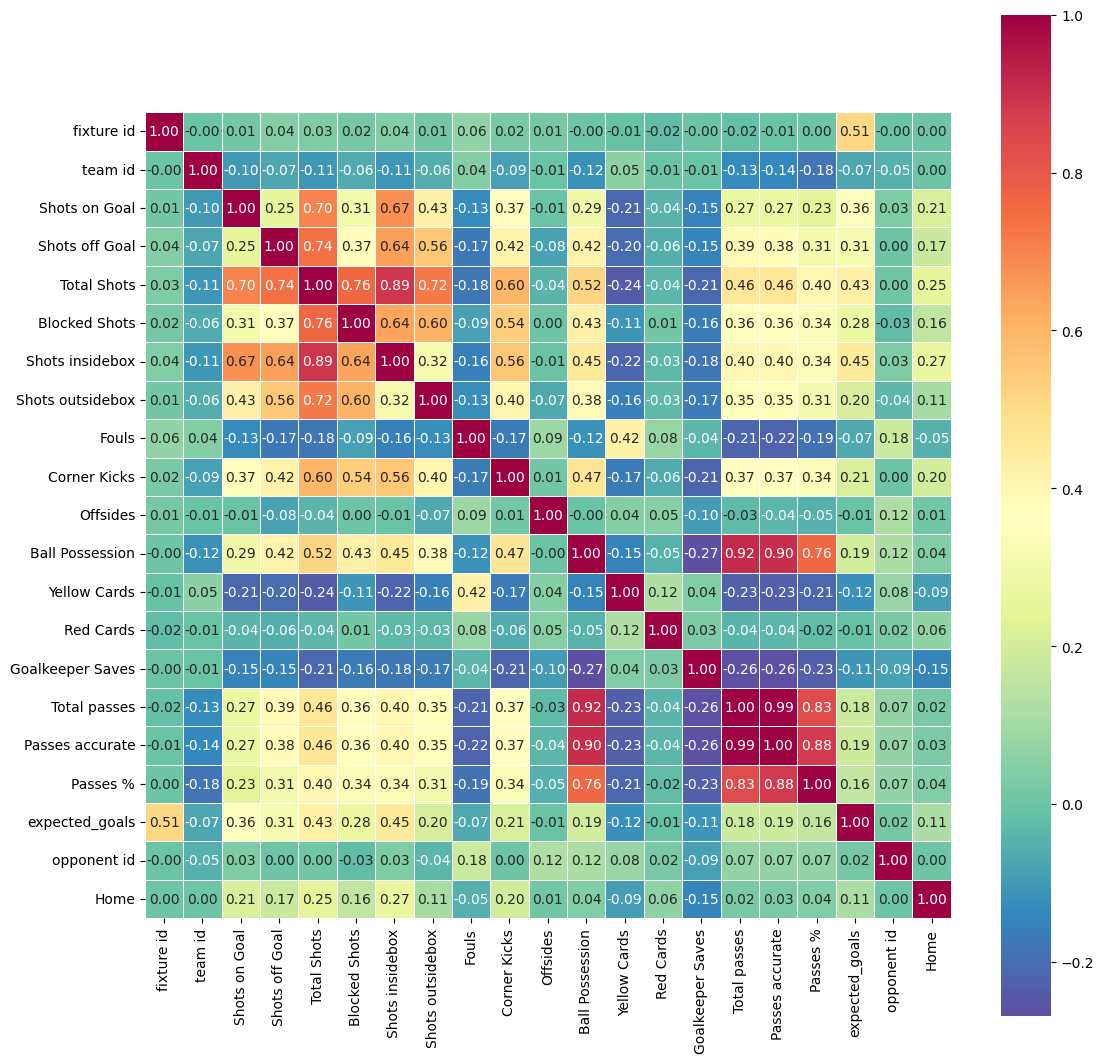

In [141]:
#plot correlation as heatmap
import matplotlib.pyplot as plt
#plt.figure (figsize = (13 , 13) )
#sns.heatmap(match_stats_df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

corrmat = df.corr()
plt.figure(figsize=(13,13))

hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r",
                linewidths=.5)
plt.show()

Considering the Red card has no effect on the final result, we would drop it

In [ ]:
match_stats_df = match_stats_df.drop()